In [1]:
import math
import numpy
import boxkit
import matplotlib.pyplot as pyplot

In [2]:
dataset_blocks=boxkit.read.Dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-earth/heater2D/blocks/INS_Pool_Boiling_Heater_hdf5_0030")
dataset_oneblk=boxkit.read.Dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-earth/heater2D/oneblk/INS_Pool_Boiling_Heater_hdf5_0030")

In [3]:
def plot_phi(dataset):
    pyplot.figure(figsize=[6,6])
    pyplot.rc("font", family="serif", size=14, weight="bold")
    pyplot.rc("axes", labelweight="bold", titleweight="bold")
    pyplot.rc("text", usetex=True)
    for block in dataset.blocklist:
        xmesh, zmesh = numpy.meshgrid(block.xrange("center"), block.zrange("center"))
        pyplot.contour(xmesh, zmesh, block["phi"][:,0,:], levels=[0])
    pyplot.tight_layout()
    pyplot.xlim([dataset.xmin, dataset.xmax])
    pyplot.ylim([dataset.zmin, dataset.zmax])
    pyplot.show()

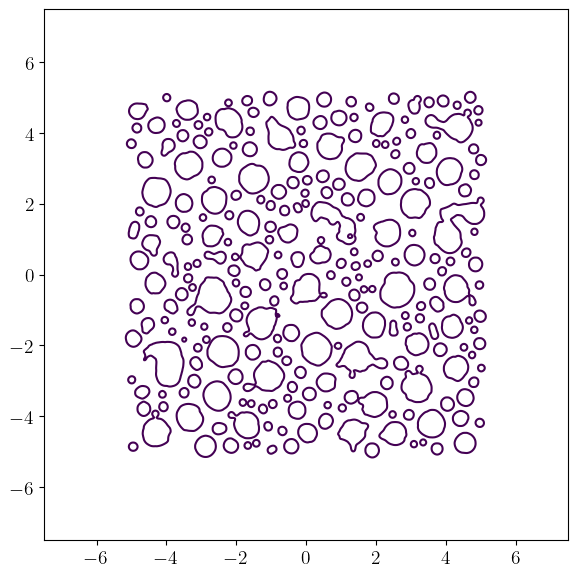

In [4]:
plot_phi(dataset_oneblk)

/tmp/ipykernel_47316/1939431775.py:8: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xmesh, zmesh, block["phi"][:,0,:], levels=[0])


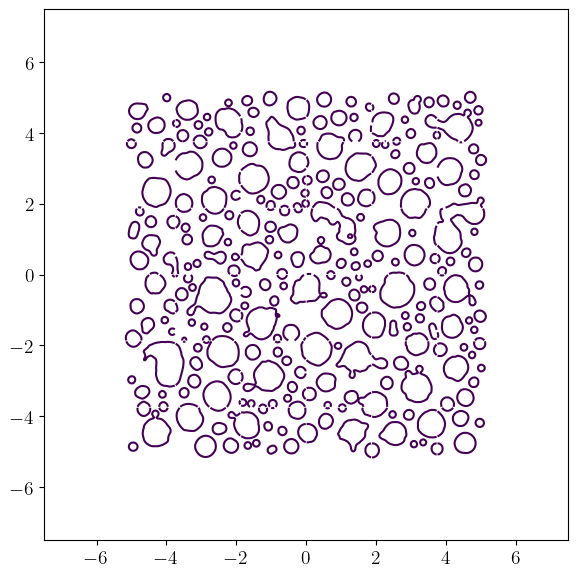

In [5]:
plot_phi(dataset_blocks)

In [6]:
reshaped_dataset=boxkit.reshape.Mergeblocks(dataset_blocks, "phi", nthreads=1, backend="loky")

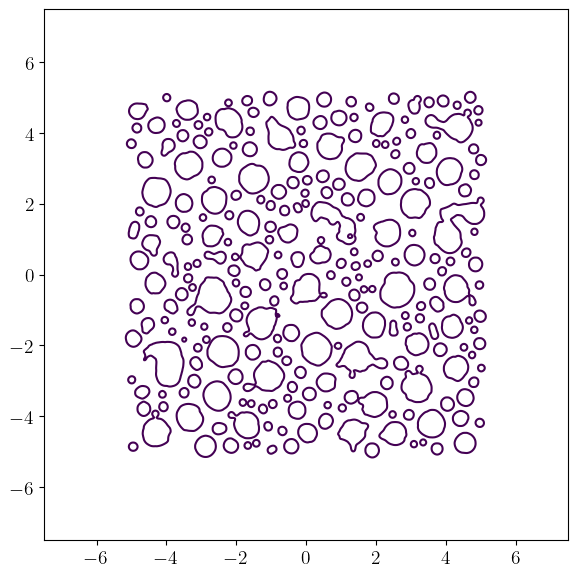

In [7]:
plot_phi(reshaped_dataset)

In [8]:
dataset_lowg=boxkit.read.Dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-lowg/heater2D/INS_Pool_Boiling_Heater_hdf5_0030")

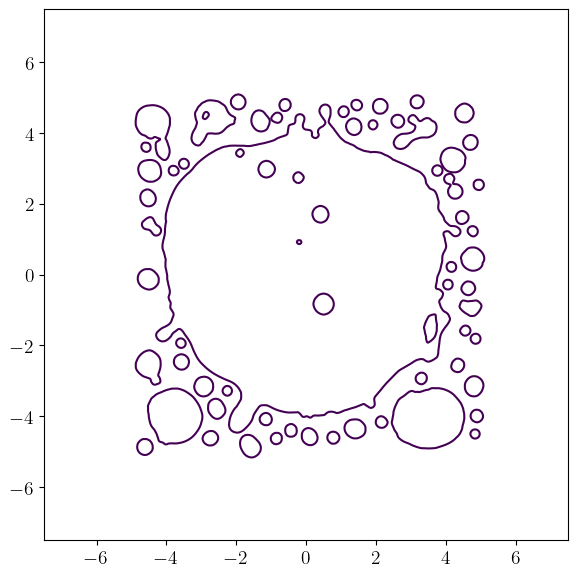

In [9]:
dataset_lowg=boxkit.reshape.Mergeblocks(dataset_lowg, "phi")
plot_phi(dataset_lowg)

In [10]:
def plot_phi_3D(dataset):
    pyplot.figure(figsize=[6,6])
    pyplot.rc("font", family="serif", size=14, weight="bold")
    pyplot.rc("axes", labelweight="bold", titleweight="bold")
    pyplot.rc("text", usetex=True)
    for block in dataset.blocklist:
        xmesh, ymesh = numpy.meshgrid(block.xrange("center"), block.yrange("center"))
        pyplot.contour(xmesh, ymesh, block["phi"][50,:,:], levels=[0])
    pyplot.tight_layout()
    pyplot.xlim([dataset.xmin, dataset.xmax])
    pyplot.ylim([dataset.ymin, dataset.ymax])
    pyplot.show()

In [11]:
dataset_3D=boxkit.read.Dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-earth/domain3D/not-chunked/INS_Pool_Boiling_hdf5_0030")

[cpu_count]: 8 [cpu_avail]: 4 [mem_avail]: 3.5 GB [cpu_usage]: 56.0% [mem_usage]: 78.2%
[mem_dataset]: 488.28 MB
run-loky:boxkit.api.reshape._mergeblocks.map_blk_to_merged_dset


100%|██████████| 4096/4096 [00:00<00:00, 15711.68it/s]


[boxkit.stencils.map_dataset_block]: 0.275s
[boxkit.reshape.mergeblocks]: 0.408s


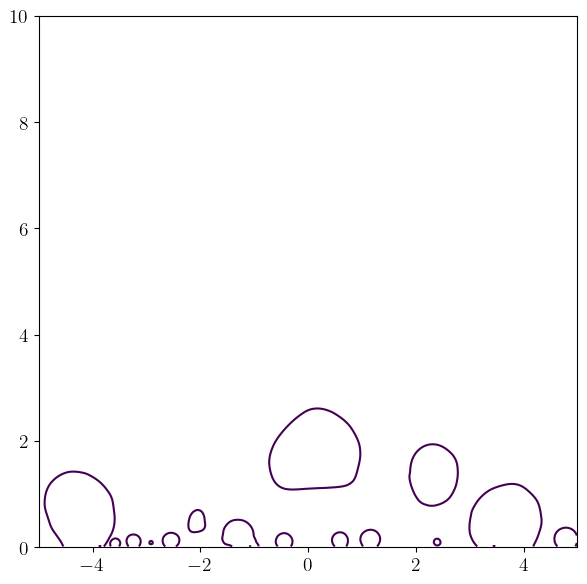

In [12]:
dataset_3D=boxkit.reshape.Mergeblocks(dataset_3D, "phi", monitor=True, nthreads=1, backend="loky")
plot_phi_3D(dataset_3D)

In [13]:
dataset_3D=boxkit.read.Dataset("/Users/Akash/Box/Jarvis-DataShare/Bubble-Box-Sample/boiling-lowg/domain3D/INS_Pool_Boiling_hdf5_0030")

[cpu_count]: 8 [cpu_avail]: 2 [mem_avail]: 3.87 GB [cpu_usage]: 76.6% [mem_usage]: 75.8%
[mem_dataset]: 488.28 MB
run-loky:boxkit.api.reshape._mergeblocks.map_blk_to_merged_dset


100%|██████████| 4096/4096 [00:01<00:00, 3065.51it/s]


[boxkit.stencils.map_dataset_block]: 1.682s
[boxkit.reshape.mergeblocks]: 1.944s


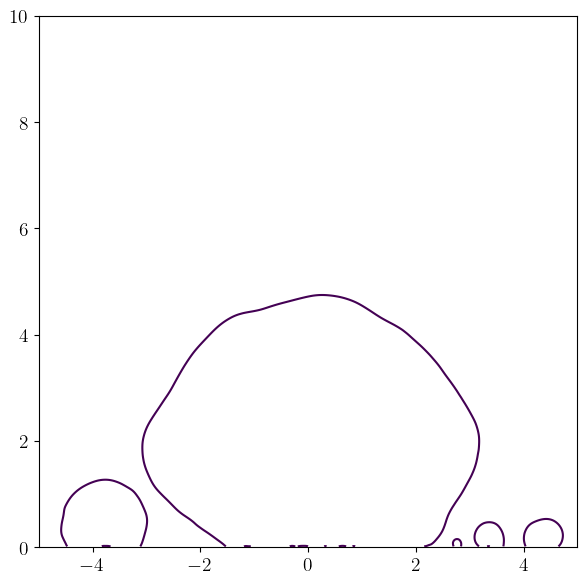

In [14]:
dataset_3D=boxkit.reshape.Mergeblocks(dataset_3D, "phi", monitor=True, nthreads=2, backend="loky")
plot_phi_3D(dataset_3D)